## Linear Variational Method

:::{admonition} **What You Need to Know**
:class: note

- The variational method is a powerful tool for estimating upper bounds and approximations for ground-state energies in a wide range of quantum mechanical problems.  
- It plays a key role in electronic structure theories, such as Hartree-Fock.  
- The **linear variational method** seeks solutions to the Schrödinger equation by representing trial wavefunctions as linear combinations of simple, computationally efficient functions, such as Gaussians or exponentials.  
- By applying the linear variational method, the Schrödinger equation is transformed into a linear algebra problem, where the goal is to find eigenvalues (representing energies) and eigenvectors (providing coefficients for the linear combination).  

:::


### Linearizing the problem

**Basis sets and coefficients**

- How does linearization help us in practice? If we can not exactly solve and have an expression for $\psi$ then we can expand the wavefunction in some convenient **basis set** $f_n$ (e.g bunch of functions indexed by n, like fourier series)  and attempt to make it get as closer to realistic energies and wavefunction as possible. 

$$\phi(r) = \sum_n^N c_nf_n(r)$$

- If we have infinite number of basis functions in pricniple that should approximate any funciton and we can get nearly exact numerical solution. However computationally this is not feasible.
- Truncating this expansion at any finite $n$ leads to an approximate solution. The idea is to keep just the optimal number of basis functions. 

- The variational principle tells us is that we can minimize the energy with respect to variational paramters ${c_n}$ and still have $E_\phi \geq E_0$.  

**Gaussians are commonly used as basis sets**

- Gaussian-type orbitals (GTOs) are a standard example because they make integrals analytically tractable. Consider a simple 1s-like primitive Gaussian:

$$
f(r) = e^{-\alpha r^2}
$$

- To represent a more flexible radial shape, we expand the true orbital as a **linear combination of Gaussians**:

$$
\phi(r) = \sum_{n=1}^N c_n e^{-\alpha_n r^2}
$$

- Even though a hydrogenic 1s orbital behaves as $e^{-r/a_0}$, which is *not* Gaussian, we can approximate its shape remarkably well using only 3–6 Gaussians. This is the idea behind the STO-nG basis sets.

### Smallest example

- We will illustrate this idea and the general matrix construction with a simple example of two basis functions ($N=2$)

$$\phi = c_1f_1 + c_2f_2$$

- There is currently no need to define these functions explicitly so we will leave them as generic functions $f_1$ and $f_2$.  We now solve for the energy

$$E_\phi = \frac{\langle\phi|\hat{H}|\phi\rangle}{\langle\phi|\phi\rangle} = \frac{\langle c_1f_1 + c_2f_2|\hat{H}|c_1f_1 + c_2f_2 \rangle}{\langle c_1f_1 + c_2f_2|c_1f_1 + c_2f_2 \rangle}$$

:::{admonitition} **Express probelm in terms of coeeficients and matrix elements**
:class: dropdown

- Let's investigate the numerator and denomenator separately.  We start with the numerator

$$\langle c_1f_1 + c_2f_2|\hat{H}|c_1f_1 + c_2f_2 \rangle = \langle c_1f_1|\hat{H}|c_1f_1\rangle + \langle c_1f_1|\hat{H}|c_2f_2\rangle +\langle c_2f_2|\hat{H}|c_1f_1\rangle + \langle c_2f_2|\hat{H}|c_2f_2\rangle$$

$$ = c_1^*c_1\langle f_1|\hat{H}|f_1\rangle + c_1^*c_2\langle f_1|\hat{H}|f_2\rangle +c_2^*c_1\langle f_2|\hat{H}|f_1\rangle + c_2^*c_2\langle f_2|\hat{H}|f_2\rangle$$

- We note that $c_i$ are real and thus $c_1^*c_1=c_1^2$ and $c_1c_2=c_2c_1$ thus

$$Numerator = c_1^2 \langle f_1|\hat{H}|f_1\rangle + c_1c_2\langle f_1|\hat{H}|f_2\rangle +c_2c_1\langle f_2|\hat{H}|f_1\rangle + c_2^2\langle f_2|\hat{H}|f_2\rangle$$

- Finally we recognize that since $\hat{H}$ is Hermitian, we have $\langle f_2|\hat{H}|f_1\rangle = \langle f_1|\hat{H}|f_2\rangle$ yielding 

$$Numerator = c_1^2 \langle f_1|\hat{H}|f_1\rangle + 2c_1c_2\langle f_1|\hat{H}|f_2\rangle + c_2^2\langle f_2|\hat{H}|f_2\rangle$$

- We will refer to the integrals above as *matrix elements* with, generically, $H_{ij} = \langle f_i|\hat{H}|f_j\rangle$. We now consider the denominator of the energy equation above and we utilize similar algebra for the numerator to get

$$\langle c_1f_1 + c_2f_2|c_1f_1 + c_2f_2 \rangle = c_1^2S_{11} + 2c_1c_2S_{12} + c_2^2S_{22}$$

$$S_{ij} = \langle f_i|f_j\rangle$$

where $S_{ij}$ is another matrix element but this time referred to as the basis function overlap.Now we have that the energy of the trial wavefunction is
:::


$$E_\phi = \frac{c_1^2 H_{11} + 2c_1c_2H_{12} + c_2^2H_{22}}{c_1^2S_{11} + 2c_1c_2S_{12} + c_2^2S_{22}}$$

- $H_{ij} = \langle f_i |\hat{H}|f_j\rangle$  **Hamiltonian matrix element expressed in basis of $f$**
- $S_{ij} = \langle f_i|f_j\rangle$   **S matrix element or overlap integral expressed in basis of $f$**. This one measures how similiar $f_i$ is to $f_j$. 



### Eigenvalue Problem

- Since $E_\phi \geq E_0$ for any trial function $\phi$, we can minimize the energy $E_\phi$ by varying the parameters $c_1$ and $c_2$.  

- To minimize with respect to $c_1$, we differentiate $E_\phi$ with respect to $c_1$ and set the derivative equal to zero:

  $$\frac{\partial E_\phi}{\partial c_1} = 0 = c_1(H_{11} - ES_{11}) + c_2(H_{12} - ES_{12})$$

- Similarly, minimizing with respect to $c_2$ gives:

  $$\frac{\partial E_\phi}{\partial c_2} = 0 = c_1(H_{12} - ES_{12}) + c_2(H_{22} - ES_{22})$$

- These two coupled linear equations can be expressed compactly as a matrix equation:

  $$\begin{bmatrix} H_{11} - ES_{11} & H_{12} - ES_{12} \\ H_{12} - ES_{12} & H_{22} - ES_{22} \end{bmatrix} \begin{bmatrix} c_1 \\ c_2 \end{bmatrix} = 0$$

- The matrix on the left can be rewritten as the difference between two matrices:

  $$\left(\begin{bmatrix} H_{11} & H_{12} \\ H_{12} & H_{22} \end{bmatrix} - E \begin{bmatrix} S_{11} & S_{12} \\ S_{12} & S_{22} \end{bmatrix} \right) \begin{bmatrix} c_1 \\ c_2 \end{bmatrix} = 0$$

- Rearranging, we can write:

  $$
  \begin{bmatrix} H_{11} & H_{12} \\ H_{12} & H_{22} \end{bmatrix} \begin{bmatrix} c_1 \\ c_2 \end{bmatrix} = E \begin{bmatrix} S_{11} & S_{12} \\ S_{12} & S_{22} \end{bmatrix} \begin{bmatrix} c_1 \\ c_2 \end{bmatrix}
  $$

- Moving S matrix to left hand side we end up with eigenvector eigenvalue problem:


$$
\begin{bmatrix} S_{11} & S_{12} \\ S_{12} & S_{22} \end{bmatrix}^{-1}\begin{bmatrix} H_{11} & H_{12} \\ H_{12} & H_{22} \end{bmatrix} \begin{bmatrix} c_1 \\ c_2 \end{bmatrix} = E \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} c_1 \\ c_2 \end{bmatrix}
$$

:::{admonition} **Reducing QM to a matrix eigenvalue eigenvector problem**
:class: important

  $$\mathbf{H}\mathbf{c} = E\mathbf{S}\mathbf{c}$$

- By left-multiplying both sides by $\mathbf{S}^{-1}$, we transform this into a standard eigenvalue problem:

  $$\mathbf{S}^{-1}\mathbf{H}\cdot \mathbf{c} = E\mathbf{I} \cdot \mathbf{c}$$

- Therefore, the minimum energies correspond to the eigenvalues of $\mathbf{S}^{-1}\mathbf{H}$, and the variational parameters that minimize the energies are the eigenvectors of $\mathbf{S}^{-1}\mathbf{H}$. 

- $\mathbf{H}$ N by N matrix of hamiltonian elements $\langle f_i |\hat{H}|f_j\rangle$
- $S$ an N by N matrix of overlap integrals $\langle f_i|f_j\rangle$
- $\mathbf{c} = (c_1, c_2, ...)$ vector of N length.
- $E$ eigenvalues that can saitsfy this equation. For symmetric matrices one expects to get N possible values!

:::


:::{admonition} **Solving a matrix eigenvalue eigenvector problem**
:class: tip, collapse

In the equation 

$$
\mathbf{S}^{-1}\mathbf{H}\mathbf{c} = E\mathbf{I}\mathbf{c}
$$  

**$\mathbf{I}$** represents the identity matrix. Its role in this context is essential to express the equation as a **standard eigenvalue problem**.



1. **Eigenvalue Problem Form**:  

   In linear algebra, a standard eigenvalue problem is written as:  

   $$
   \mathbf{A}\mathbf{v} = \lambda \mathbf{I}\mathbf{v}
   $$  

   where:  
   - $\mathbf{A}$ is a square matrix,  
   - $\lambda$ is a scalar eigenvalue,  
   - $\mathbf{I}$ is the identity matrix, and  
   - $\mathbf{v}$ is the corresponding eigenvector.

   The identity matrix $\mathbf{I}$ ensures that $\lambda$ scales the eigenvector $\mathbf{v}$ without altering its direction. The eigenvalue problem is about finding the values of $\lambda$ and their associated $\mathbf{v}$.

2. **Connecting to $\mathbf{S}^{-1}\mathbf{H}\mathbf{c} = E\mathbf{I}\mathbf{c}$**:  

   Here, $\mathbf{S}^{-1}\mathbf{H}$ acts as the operator $\mathbf{A}$ in the standard eigenvalue problem.  
   - $\mathbf{S}^{-1}\mathbf{H}$ is a matrix resulting from left-multiplying $\mathbf{H}$ by the inverse of $\mathbf{S}$.  
   - $\mathbf{c}$ represents the eigenvector.  
   - $E$ is the eigenvalue (corresponding to the energy in the quantum mechanical system).  

   The identity matrix $\mathbf{I}$ is explicitly included to highlight that $E$ is a scalar multiplying the vector $\mathbf{c}$. This ensures that the left-hand side (a matrix operation) matches the right-hand side (a scaled vector).  

3. **Why $\mathbf{S}^{-1}$ Appears**:  

   Initially, we had:  
   
   $$
   \mathbf{H}\mathbf{c} = E\mathbf{S}\mathbf{c}
   $$  
   
   which cannot directly be interpreted as an eigenvalue problem because of the presence of $\mathbf{S}$ (the overlap matrix). To transform this into a standard form, we pre-multiply both sides by $\mathbf{S}^{-1}$:  
   
   $$
   \mathbf{S}^{-1}\mathbf{H}\mathbf{c} = E\mathbf{S}^{-1}\mathbf{S}\mathbf{c}
   $$  
   
   Since $\mathbf{S}^{-1}\mathbf{S} = \mathbf{I}$, this simplifies to:  
   
   $$
   \mathbf{S}^{-1}\mathbf{H}\mathbf{c} = E\mathbf{I}\mathbf{c}
   $$

4. **How to Interpret This as an Eigenvalue Problem**:  
   The equation now has the form of a standard eigenvalue problem:  

   $$
   \mathbf{A}\mathbf{v} = \lambda \mathbf{I}\mathbf{v}
   $$  

   where:  
   - $\mathbf{A} = \mathbf{S}^{-1}\mathbf{H}$ is the effective matrix to diagonalize,  
   - $\lambda = E$ are the eigenvalues, corresponding to the energy levels,  
   - $\mathbf{v} = \mathbf{c}$ are the eigenvectors, containing the coefficients of the trial wavefunctions.

5. **Physical Interpretation**:  
   Solving the eigenvalue problem $\mathbf{S}^{-1}\mathbf{H}\mathbf{c} = E\mathbf{I}\mathbf{c}$ gives the approximate energies ($E$) of the quantum system as eigenvalues and the corresponding variational parameters ($\mathbf{c}$) as eigenvectors. The identity matrix $\mathbf{I}$ is crucial for preserving the standard form of the eigenvalue problem, ensuring proper mathematical and physical interpretation.
:::

## Example: Particle in a Box

- Let's consider a free particle in 1D bounded to $0\leq x\leq a$.  The Hamiltonian for such a system is simply the kinetic energy operator

$$\hat{H} = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2}$$

- While we can have solved this problem analytically, it will be instructive to see how the variational solution works.  We start by approximating $\psi(x)$ as an expansion in two basis functions $f_1=x(a-x)$ and $f_2=x^2(a-x)^2$

$$\psi(x) \approx c_1x(a-x) + c_2x^2(a-x)^2$$

- The $c_1$ and $c_2$ are the variational parameters to find them we first construct the Hamiltonian matrix, $\mathbf{H}$, and the basis function overlap matrix, $\mathbf{S}$.  

$$H_{ij} = \langle f_i|\hat{H}|f_j\rangle$$

$$S_{ij} = \langle f_i|f_j\rangle $$

- We will then compute and diagonlize the $\mathbf{S}^{-1}\mathbf{H}$ matrix.  



:::{admonition} **Computing the matrix elements**
:class tip, dropdown

In this problem, we have two basis functions

$$f_1(x) = x(a-x)$$

and 

$$f_2(x) = x^2(a-x)^2$$

now the task of computing matrix elements comes down to forming integrals with these two and carrying out integration

$$H_{11} = \langle x(a-x)|\hat{H}|x(a-x)\rangle$$

$$= \langle ax|\hat{H}|ax\rangle -\langle ax|\hat{H}|x^2\rangle - \langle x^2|\hat{H}|ax\rangle + \langle x^2|\hat{H}|x^2\rangle$$

$$ = -a\langle x|\hat{H}|x^2\rangle + \langle x^2|\hat{H}|x^2\rangle$$

where the last equality holds because the second derivative of $x$ with respect to x is zero. Let's now investigate each of these integrals

$$\langle x|\hat{H}|x^2\rangle = \int_0^ax \frac{-\hbar^2}{2m}\frac{d^2}{dx^2} x^2dx \\ = \frac{-\hbar^2}{m}\int_0^axdx = \frac{-\hbar^2a^2}{2m}$$

Similarly we should get

$$\langle x^2|\hat{H}|x^2\rangle =\frac{-\hbar^2a^3}{3m}$$

Thus

$$H_{11} = -a\frac{-\hbar^2a^2}{2m} + \frac{-\hbar^2a^3}{3m} = \frac{\hbar^2a^3}{6m}$$

$$H_{22} = \langle x^2(a-x)^2|\hat{H}|x^2(a-x)^2\rangle$$

$$ = \langle a^2x^2|\hat{H}|a^2x^2\rangle -2\langle a^2x^2|\hat{H}|2ax^3\rangle + \langle a^2x^2|\hat{H}|x^4\rangle -2\langle ax^3|\hat{H}|a^2x^2\rangle + 4\langle ax^3|\hat{H}|ax^3\rangle -2\langle ax^3|\hat{H}|x^4\rangle + \langle x^4|\hat{H}|a^2x^2\rangle - 2\langle x^4|\hat{H}|ax^3\rangle + \langle x^4|\hat{H}|x^4\rangle$$

$$ = \frac{-\hbar^2a^7}{3m} +\frac{3\hbar^2 a^7}{m} - \frac{6\hbar^2 a^7}{5m} +\frac{\hbar^2 a^7}{2m} - \frac{12\hbar^2 a^7}{5m} +\frac{2\hbar^2 a^7}{m} - \frac{\hbar^2 a^7}{5m} + \frac{\hbar^2 a^7}{m} - \frac{6\hbar^2 a^7}{7m}$$

$$ = \frac{\hbar^2a^7}{105m} $$

$$H_{12} = H_{21} = \frac{\hbar^2a^5}{30m}$$

We can now complete the Hamiltonian matrix, $\mathbf{H}$,

$$\mathbf{H} = \frac{\hbar^2a^3}{m} \begin{bmatrix} \frac{1}{6} & \frac{a^2}{30}\\ \frac{a^2}{30} & \frac{a^4}{105} \end{bmatrix}$$

Similarily one could carry out all the integrals for $\mathbf{S}$


$$\mathbf{S} = \frac{a^5}{10} \begin{bmatrix} \frac{1}{3} & \frac{a^2}{14}\\ \frac{a^2}{14} & \frac{a^4}{63} \end{bmatrix}$$

:::

- We have obtaind all matrix elements in previous section and are now ready to obtain eigenvalues

$$\mathbf{H} = \frac{\hbar^2a^3}{m} \begin{bmatrix} \frac{1}{6} & \frac{a^2}{30}\\ \frac{a^2}{30} & \frac{a^4}{105} \end{bmatrix}$$

$$\mathbf{S} = \frac{a^5}{10} \begin{bmatrix} \frac{1}{3} & \frac{a^2}{14}\\ \frac{a^2}{14} & \frac{a^4}{63} \end{bmatrix}$$

In [17]:
import numpy as np
from scipy.linalg import eig, inv, eigh

# Lets adopt simpler units
a = 1.0
hbar = 1.0
m = 1.0

S = np.array([[1.0/30.0, 1.0/140.0],[1.0/140.0,1.0/630.0]])
H = np.array([[1.0/6.0,1.0/30.0],[1.0/30.0,1.0/105.0]])

e, v = eig(inv(S) @ H) #e, v = eigh(H, S) #Same values eigh is for hermitian matrices

print("Eigenvalues:", e)
print("First eigenvector:", v[:,0])

Eigenvalues: [ 4.93487481+0.j 51.06512519+0.j]
First eigenvector: [-0.66168489 -0.74978204]


So we see that the smallest energy in this basis is 

$$E_\phi = 4.9349 \frac{\hbar^2}{m}$$

How does this compare to the analytic solution?  Plugging in for the ground state, $n=1$, and $a=1$ we get

$$E_1 = \frac{\pi^2\hbar^2}{2} \approx 4.9348 \frac{\hbar^2}{m} $$

So we can see that our variational solution worked out well for the energy.  Now how about the wavefunction?

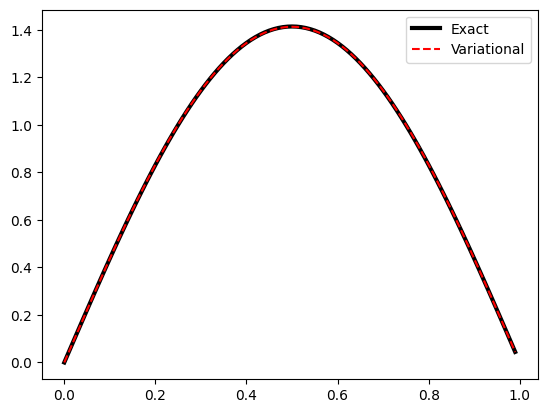

In [ ]:
# plot wavefunction
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib inline
# x values
x = np.arange(0,1,0.01)
# exact wavefunction
psi1Exact = np.sqrt(2)*np.sin(np.pi*x) 
plt.plot(x,psi1Exact,'k-',label="Exact",lw=3)
# variational basis function wavefunction
psi1Var = v[0,0]*x*(1-x) + v[1,0]*x**2*(1-x)**2
norm = np.sqrt(integrate.simps(np.power(psi1Var,2),x))
plt.plot(x,-psi1Var/norm,'r--', label="Variational")
plt.xlabel('x')
plt.ylabel('$P(x)$')
plt.legend()